In [1]:
from pyforest import *

### Loading the data

In [2]:
df_main=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

<IPython.core.display.Javascript object>

In [3]:
df_main.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
df_main.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


### checking for null values

In [6]:
df_main.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

### feature selection

In [7]:
df_main.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [8]:
df_main_new=df_main[['status','card_present_flag','txn_description','balance','date','gender',
                     'age','merchant_suburb','merchant_state','amount','customer_id','movement']]

In [9]:
df_main_new.date = pd.to_datetime(df_main_new.date)

<IPython.core.display.Javascript object>

C:\Users\kapil\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df_main_new.head()

,status,card_present_flag,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,POS,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,POS,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,SALES-POS,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


### Exploratory Data Analysis (EDA)

### Number of transactions taking place on each day

In [11]:
df_main_new.date.value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

### Total transactions made by each customer

In [12]:
df_main_new.customer_id.value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### Total transactions made by each customer on each day

In [13]:
df_main_new.groupby('customer_id')['date'].value_counts()

customer_id     date      
CUS-1005756958  2018-08-25    6
                2018-08-07    4
                2018-08-22    4
                2018-08-03    3
                2018-08-04    3
                             ..
CUS-883482547   2018-10-20    1
                2018-10-24    1
                2018-10-26    1
                2018-10-30    1
                2018-10-31    1
Name: date, Length: 5521, dtype: int64

### Transaction volume w.r.t average/mean transaction volume for each day

In [14]:
df_datewise_count=df_main_new.groupby('date').count()

In [15]:
transac_volume=df_datewise_count.customer_id.mean()
points=len(df_datewise_count.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

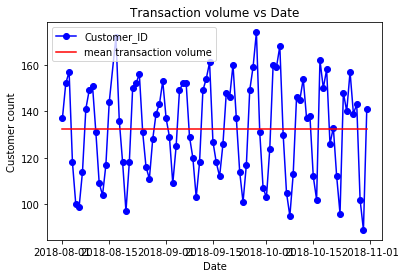

In [16]:
plt.figure()
#plotting the transaction volume
plt.plot(df_datewise_count.index, df_datewise_count.customer_id, c='b', label='Customer_ID', marker='o')
#plotting the mean volume transaction line
plt.plot(df_datewise_count.index, np.linspace(transac_volume,transac_volume,points), c='r', label='mean transaction volume')
plt.xlabel('Date')
plt.ylabel('Customer count')
plt.title('Transaction volume vs Date')
plt.legend()
plt.show()

### Transaction amount w.r.t average/mean transaction amount each day

In [17]:
df_datewise_mean=df_main_new.groupby('date').mean()
amount_transac=df_datewise_mean.amount.mean()
meanline_points=len(df_datewise_mean.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

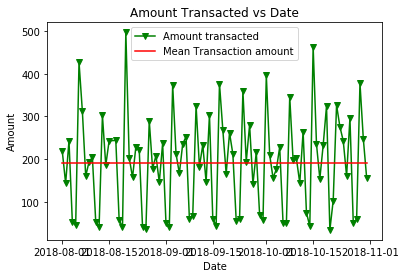

In [18]:
plt.figure()
#plotting the amount transacted
plt.plot(df_datewise_count.index, df_datewise_mean.amount, c='g', label='Amount transacted', marker='v')
#plotting the mean transaction line
plt.plot(df_datewise_count.index, np.linspace(amount_transac,amount_transac,meanline_points), c='r', label='Mean Transaction amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Amount Transacted vs Date')
plt.legend()
plt.show()

In [20]:
#now we are going to extract a new feature 'month' from an existing feature 'date'
months=[]
for i in df_main_new.date:
    if i.month == 8:
        months.append('August')
    elif i.month == 9:
        months.append('September')
    elif i.month == 10:
        months.append('October')

In [31]:
df_main_new['month']=months
df_main_new.head()

C:\Users\kapil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,status,card_present_flag,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,month
0,authorized,1.0,POS,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,August
1,authorized,0.0,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,August
2,authorized,1.0,POS,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,August
3,authorized,1.0,SALES-POS,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,August
4,authorized,1.0,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit,August


In [73]:
#adding the week number feature
df_main_new['week number']=df_main_new.date.dt.week

C:\Users\kapil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
df_main_new.head()

,status,card_present_flag,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,month,week number
0,authorized,1.0,POS,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,August,31
1,authorized,0.0,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,August,31
2,authorized,1.0,POS,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,August,31
3,authorized,1.0,SALES-POS,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,August,31
4,authorized,1.0,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit,August,31


### Average/Mean transaction amount per month

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Average transaction for each month')

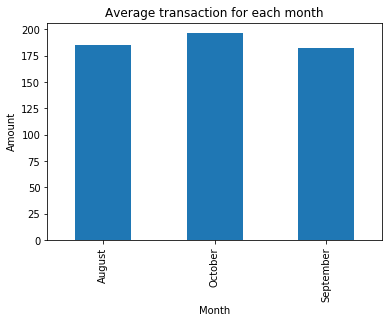

In [57]:
df_main_new.groupby('month')['amount'].mean().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Average transaction for each month')

### Transaction volume w.r.t average/mean transaction volume per month 

In [45]:
df_month_count=df_main_new.groupby('month').count()
transac_volume1=df_month_count.customer_id.mean()
points_a=len(df_month_count.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

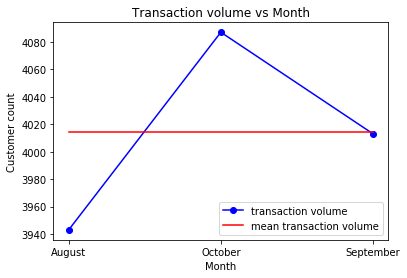

In [59]:
plt.figure()
#plotting the transaction volume
plt.plot(df_month_count.index, df_month_count.customer_id, c='b', label='transaction volume', marker='o')
#plotting the mean volume transaction line
plt.plot(df_month_count.index, np.linspace(transac_volume1,transac_volume1,points_a), c='r', label='mean transaction volume')
plt.xlabel('Month')
plt.ylabel('Customer count')
plt.title('Transaction volume vs Month')
plt.legend()
plt.show()

### Average/Mean transaction amount per week

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

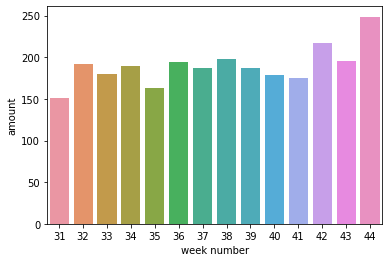

In [79]:
sns.barplot(x='week number', y='amount', estimator=np.mean, data=df_main_new, ci=None)

### Monthwise comparison of average customer balance vs customer balance w.r.t age and gender

In [82]:
#august month
df_cust_id_aug = df_main_new[df_main_new["month"] == "August"].groupby("customer_id").mean()
df_gender_aug = df_main_new[df_main_new["month"] == "August"].groupby("gender").mean()

In [83]:
female_mean_bal_aug = df_gender_aug["balance"].iloc[0]
male_mean_bal_aug = df_gender_aug["balance"].iloc[1]
line_points = len(df_cust_id_aug["age"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

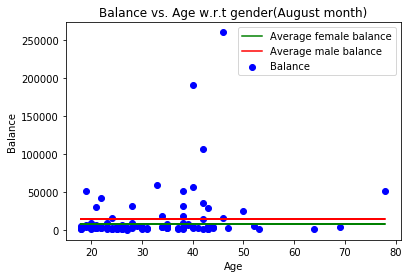

In [104]:
plt.figure()
plt.scatter(df_cust_id_aug["age"], df_cust_id_aug["balance"], c="b", label="Balance")
plt.plot(df_cust_id_aug["age"], np.linspace(female_mean_bal_aug,female_mean_bal_aug,line_points), c="g", label = "Average female balance")
plt.plot(df_cust_id_aug["age"], np.linspace(male_mean_bal_aug,male_mean_bal_aug,line_points), c="r", label = "Average male balance")
plt.title("Balance vs. Age w.r.t gender(August month)")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()

In [86]:
#september month
df_cust_id_sept = df_main_new[df_main_new["month"] == "September"].groupby("customer_id").mean()
df_gender_sept = df_main_new[df_main_new["month"] == "September"].groupby("gender").mean()

In [87]:
female_mean_bal_sept = df_gender_sept["balance"].iloc[0]
male_mean_bal_sept = df_gender_sept["balance"].iloc[1]
line_s_points = len(df_cust_id_sept["age"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

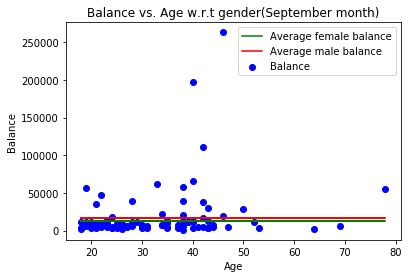

In [103]:
plt.figure()
plt.scatter(df_cust_id_sept["age"], df_cust_id_sept["balance"], c="b", label="Balance")
plt.plot(df_cust_id_sept["age"], np.linspace(female_mean_bal_sept,female_mean_bal_sept,line_s_points), c="g", label = "Average female balance")
plt.plot(df_cust_id_sept["age"], np.linspace(male_mean_bal_sept,male_mean_bal_sept,line_s_points), c="r", label = "Average male balance")
plt.title("Balance vs. Age w.r.t gender(September month)")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()

In [92]:
#october month
df_cust_id_oct = df_main_new[df_main_new["month"] == "October"].groupby("customer_id").mean()
df_gender_oct = df_main_new[df_main_new["month"] == "October"].groupby("gender").mean()

In [93]:
female_mean_bal_oct = df_gender_oct["balance"].iloc[0]
male_mean_bal_oct = df_gender_oct["balance"].iloc[1]
line_o_points = len(df_cust_id_oct["age"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

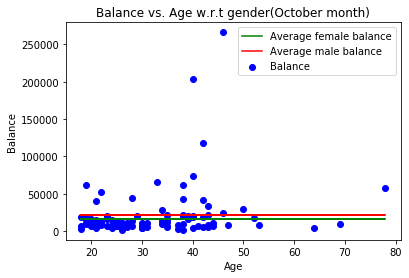

In [102]:
plt.figure()
plt.scatter(df_cust_id_oct["age"], df_cust_id_oct["balance"], c="b", label="Balance")
plt.plot(df_cust_id_oct["age"], np.linspace(female_mean_bal_oct,female_mean_bal_oct,line_o_points), c="g", label = "Average female balance")
plt.plot(df_cust_id_oct["age"], np.linspace(male_mean_bal_oct,male_mean_bal_oct,line_o_points), c="r", label = "Average male balance")
plt.title("Balance vs. Age w.r.t gender(October month)")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()

### Monthwise  comparison between average transaction amount vs transaction amount w.r.t age and gender

In [101]:
#august month
female_mean_amount_aug = df_gender_aug["amount"].iloc[0]
male_mean_amount_aug = df_gender_aug["amount"].iloc[1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

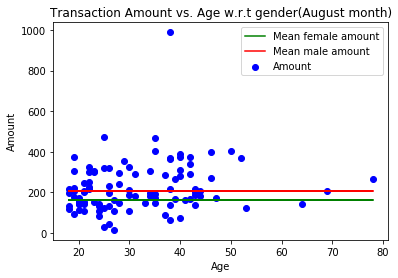

In [105]:
plt.scatter(df_cust_id_aug["age"], df_cust_id_aug["amount"], c="b", label="Amount")
plt.plot(df_cust_id_aug["age"], np.linspace(female_mean_amount_aug,female_mean_amount_aug,line_points), c="g", label = "Mean female amount")
plt.plot(df_cust_id_aug["age"], np.linspace(male_mean_amount_aug,male_mean_amount_aug,line_points), c="r", label = "Mean male amount")
plt.title("Transaction Amount vs. Age w.r.t gender(August month)")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend()

In [112]:
#september month
female_mean_amount_sept = df_gender_sept["amount"].iloc[0]
male_mean_amount_sept = df_gender_sept["amount"].iloc[1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

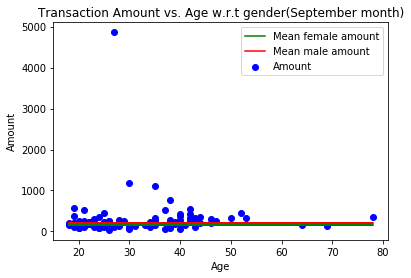

In [113]:
plt.scatter(df_cust_id_sept["age"], df_cust_id_sept["amount"], c="b", label="Amount")
plt.plot(df_cust_id_sept["age"], np.linspace(female_mean_amount_sept,female_mean_amount_sept,line_s_points), c="g", label = "Mean female amount")
plt.plot(df_cust_id_sept["age"], np.linspace(male_mean_amount_sept,male_mean_amount_sept,line_s_points), c="r", label = "Mean male amount")
plt.title("Transaction Amount vs. Age w.r.t gender(September month)")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend()

In [110]:
#october month
female_mean_amount_oct = df_gender_oct["amount"].iloc[0]
male_mean_amount_oct = df_gender_oct["amount"].iloc[1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

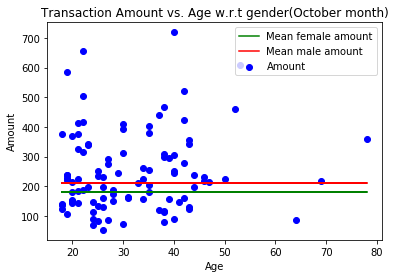

In [111]:
plt.scatter(df_cust_id_oct["age"], df_cust_id_oct["amount"], c="b", label="Amount")
plt.plot(df_cust_id_oct["age"], np.linspace(female_mean_amount_oct,female_mean_amount_oct,line_o_points), c="g", label = "Mean female amount")
plt.plot(df_cust_id_oct["age"], np.linspace(male_mean_amount_oct,male_mean_amount_oct,line_o_points), c="r", label = "Mean male amount")
plt.title("Transaction Amount vs. Age w.r.t gender(October month)")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend()

### Statewise comparison of average transaction amount

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

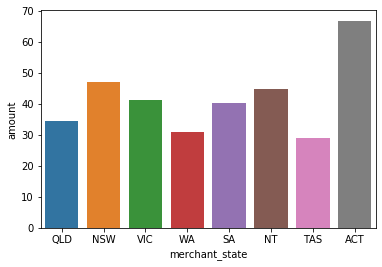

In [114]:
sns.barplot(x=df_main_new.merchant_state, y=df_main_new.amount, estimator=np.mean, ci=None)

### Genderwise comparison of average customer balance and merchant state

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

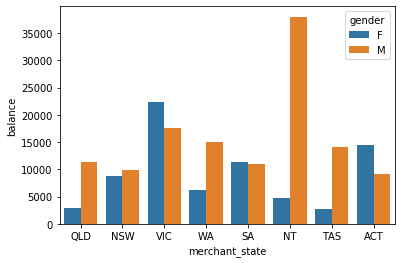

In [117]:
sns.barplot(x=df_main_new.merchant_state, y=df_main_new.balance, hue=df_main_new.gender, estimator=np.mean, ci=None)

### Monthwise comparison of average customer balance and merchant state

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

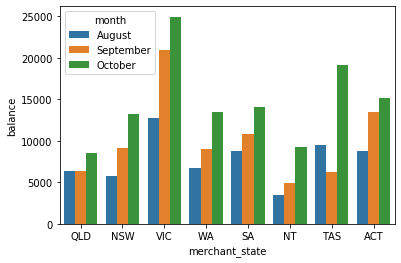

In [125]:
sns.barplot(x=df_main_new.merchant_state, y=df_main_new.balance, hue=df_main_new.month, estimator=np.mean, ci=None)